# Breast Cancer Detection Using SVM

In [73]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

In [52]:
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

In [53]:
data = pd.read_csv(url, names = names)

In [54]:
data.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                        699 non-null int64
clump_thickness           699 non-null int64
uniform_cell_size         699 non-null int64
uniform_cell_shape        699 non-null int64
marginal_adhesion         699 non-null int64
single_epithelial_size    699 non-null int64
bare_nuclei               699 non-null object
bland_chromatin           699 non-null int64
normal_nucleoli           699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [56]:
data.describe()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DEE1231F98>,
      dtype=object)

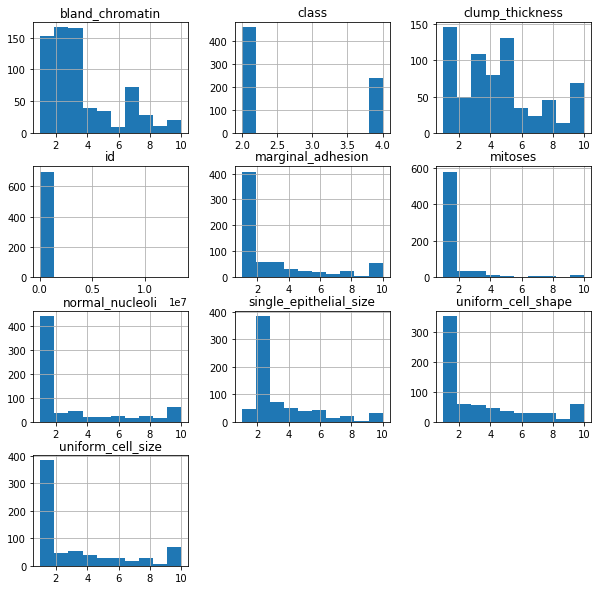

In [57]:
# Distribution of data in each feature
data.hist(figsize=(10,10))

In [58]:
# CHecking if any column has null value
data.isnull().any()

id                        False
clump_thickness           False
uniform_cell_size         False
uniform_cell_shape        False
marginal_adhesion         False
single_epithelial_size    False
bare_nuclei               False
bland_chromatin           False
normal_nucleoli           False
mitoses                   False
class                     False
dtype: bool

SyntaxError: keyword can't be an expression (<ipython-input-24-767f8f1daa99>, line 1)

In [59]:
data.loc[data['class'] == "?"]
data.loc[data['clump_thickness'] == "?"]
data.loc[data['uniform_cell_size'] == "?"]
data.loc[data['uniform_cell_shape'] == "?"]
data.loc[data['marginal_adhesion'] == "?"]
data.loc[data['single_epithelial_size'] == "?"]
print(data.loc[data['bare_nuclei'] == "?"])
data.loc[data['normal_nucleoli'] == "?"]
data.loc[data['mitoses'] == "?"]


          id  clump_thickness  uniform_cell_size  uniform_cell_shape  \
23   1057013                8                  4                   5   
40   1096800                6                  6                   6   
139  1183246                1                  1                   1   
145  1184840                1                  1                   3   
158  1193683                1                  1                   2   
164  1197510                5                  1                   1   
235  1241232                3                  1                   4   
249   169356                3                  1                   1   
275   432809                3                  1                   3   
292   563649                8                  8                   8   
294   606140                1                  1                   1   
297    61634                5                  4                   3   
315   704168                4                  6                

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class


### So bare_nuclei column has some '?' in some rows so they will be replace by the mediam of that column

In [60]:
data.replace('?',-999,inplace = True)

In [64]:
data['bare_nuclei'].median()

1.0

In [65]:
# Replacing the values with 1 which is median for bare_nuclei column
data.replace(-999,1,inplace = True)

In [67]:
data.shape

(699, 11)

In [68]:
data.columns

Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [69]:
# We can drop id column before building models
data.drop(['id'],1,inplace = True)

In [70]:
data.columns

Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [75]:
corr = data.corr()

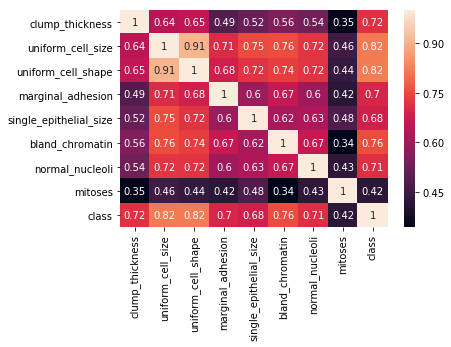

In [77]:
sns.heatmap(corr,annot= True)

In [121]:
# Creating X and Y datasets for training

X =data.drop('class',1)
y = data['class']


In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


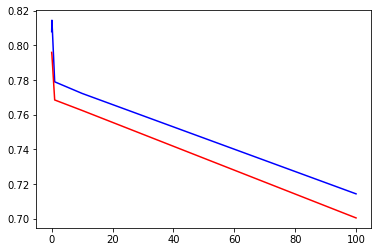

In [96]:
from sklearn.svm import LinearSVR
train_score = []
test_score = []
C = [0.01,0.1,1,10,100]
for i in C:
 svr = LinearSVR(C=i)
 svr.fit(X_train,y_train)
 train_score.append(svr.score(X_train,y_train))
 test_score.append(svr.score(X_test,y_test))
plt.plot(C,train_score,'b')
plt.plot(C,test_score,'r')

In [145]:
from sklearn.svm import LinearSVR,SVC

svr = SVC()
svr.fit(X_train,y_train)
print('Train score: {:.4f}'.format(svr.score(X_train,y_train)))
print('Test score: {:.4f}'.format(svr.score(X_test, y_test)))

Train score: 0.9982
Test score: 0.9357


C:\Users\Tanmay\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [158]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
pred = svr.predict(X_test)
print (accuracy_score(y_test, pred))
print(classification_report(y_test, pred))



0.9357142857142857
              precision    recall  f1-score   support

           2       1.00      0.91      0.95       100
           4       0.82      1.00      0.90        40

   micro avg       0.94      0.94      0.94       140
   macro avg       0.91      0.96      0.93       140
weighted avg       0.95      0.94      0.94       140



In [ ]:
# Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 